In [79]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [11]:
#Load testset
df_2020 = pd.read_csv("2020_WEP.csv", index_col=0, parse_dates=True)
df_2020.head(1)

,var1(t-336),var1(t-335),var1(t-334),var1(t-333),var1(t-332),var1(t-331),var1(t-330),var1(t-329),var1(t-328),var1(t-327),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),WEP
2020-01-08,70.78,75.5,72.69,70.36,70.33,69.55,68.62,67.6,67.04,67.13,...,83.14,85.11,78.91,77.1,75.38,71.4,70.04,68.33,65.77,53.85


In [3]:
#Load model
model = load_model('model_MLP_2.h5')

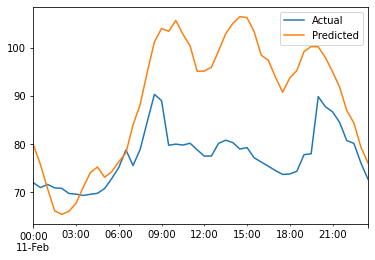

In [88]:
date = datetime.strptime('2020-02-10', '%Y-%m-%d')
date_predict = date + timedelta(days=1)
date_predict = date_predict.strftime('%Y-%m-%d')
date = date.strftime('%Y-%m-%d')

#Load input date as numpy array
arr = df_2020[date].to_numpy()

#Predict next 48 steps == 1 day
result = model.predict(arr[0:1,:-1])

df_compare=pd.DataFrame()
df_compare['Actual']=df_2020[date_predict]['WEP']

temp=pd.Series(result[0]).to_frame(name='Predicted')

temp.index=df_compare.index
df_compare['Predicted']=temp['Predicted']
df_compare.plot()

In [81]:
date_predict

'2020-01-19'